El Dataset está compuesto por una serie de columnas, que tienen los siguientes significados:

Sobreviviente: 0 = No; 1 = Si

Clase: 1 = Primera Clase; 2 = Segunda Clase; 3 = Tercera Clase

Género: 0 = Hombre; 1 = Mujer

Edad: edad en años

HermEsp: cantidad de hermanos o esposos a bordo del Titanic, para el pasajero en cuestión

PadHij: cantidad de padres o hijos a bordo del Titanic, para el pasajero en cuestión

In [1]:
# Importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree

Leer archivo .csv con pandas

In [2]:
df = pd.read_csv('DataSet_Titanic.csv')

Observo los primeros datos y su distribucion

In [3]:
df.head()

,Sobreviviente,Clase,Genero,Edad,HermEsp,PadHij
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [4]:
X = df.drop('Sobreviviente', axis=1)

Y = df.Sobreviviente

In [5]:
X.head()

,Clase,Genero,Edad,HermEsp,PadHij
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [6]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Sobreviviente, dtype: int64

In [7]:
arbol = DecisionTreeClassifier(max_depth=2, random_state=42)

In [8]:
arbol.fit(X, Y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [9]:
pred_y = arbol.predict(X)

print('Presicion: ', accuracy_score(pred_y, Y))

Presicion:  0.8025210084033614


Matriz de confusion

In [19]:
confusion_matrix(Y, pred_y)

array([[407,  17],
       [124, 166]], dtype=int64)

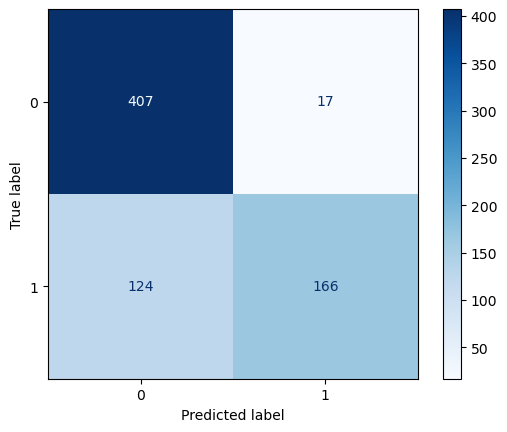

In [25]:
ConfusionMatrixDisplay.from_predictions(Y,pred_y, cmap=plt.cm.Blues)

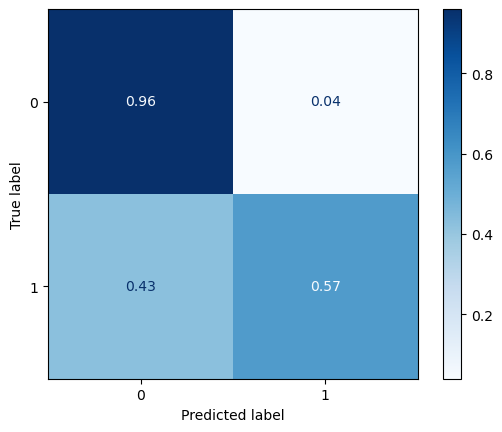

In [26]:
ConfusionMatrixDisplay.from_predictions(Y,pred_y, cmap=plt.cm.Blues, normalize='true')

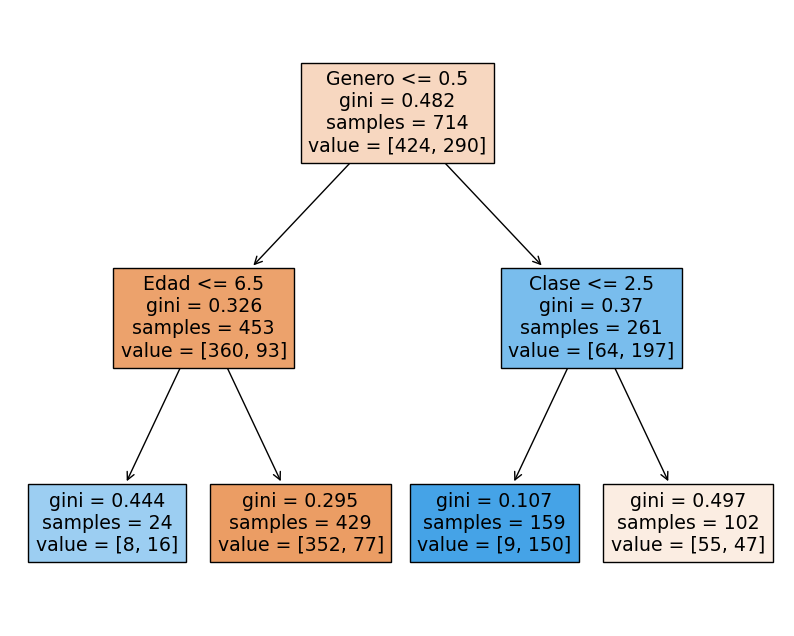

In [27]:
plt.figure(figsize=(10,8))
tree.plot_tree(arbol, filled=True, feature_names=X.columns)
plt.show()